In [2]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import translated dataframe
df = pd.read_pickle("./TraintopicsTranslated.pkl")
df

,title_description,categories,translated_text
0,REGALAME UNA NOCHE by LOS INQUIETOS ( BEsAs) -...,Arts & Entertainment,GIVE ME A NIGHT by LOS INQUIETOS (BEsAs) - JON...
1,YouTube Doki - Doki Gets BulliedDoki tries to ...,Arts & Entertainment,YouTube Doki - Doki Gets BulliedDoki tries to ...
2,Concrete Floor Leveling Tool a Paper Roller: W...,Business & Industrial,Concrete Floor Leveling Tool a Paper Roller: W...
3,Mi-T-M 3500psi 4 gpm Pressure Washer Demonstra...,"Autos & Vehicles,Home & Garden,Business & Indu...",Mi-T-M 3500psi 4 gpm Pressure Washer Demonstra...
4,Pes 15 patch Barclays e kitspatch emblemas e k...,"Games,Sports",Pes 15 Barclays patch and kitspatch Barclays P...
5,CCL2 Final Karnataka Bulldozers Vs Chennai Rhi...,"Games,Sports",CCL2 Final Karnataka Bulldozers Vs Chennai Rhi...
6,iCaro B4 4ch Channel Sony CCD IR Cameras DVR G...,"Internet & Telecom,Computers & Electronics",iCaro B4 4ch Channel Sony CCD IR Cameras DVR G...
7,Destiny: Hunt for Shaders Ep. 7 DEAD ORBIT HYP...,Games,Destiny: Hunt for Shaders Ep. 7 DEAD ORBIT HYP...
8,Sonic the Hedgehog (06) playthrough [Shadow] [...,"Games,Arts & Entertainment",Sonic the Hedgehog (06) playthrough [Shadow] [...
9,"Ультразвуковая мойка для фруктов, овощей, ягод...",Food & Drink,"Ultrasonic washing for fruits, vegetables, ber..."


In [4]:
#create dataframe for text and labels
df=pd.concat([df['translated_text'],df['categories']],axis=1)
df.head()

,translated_text,categories
0,GIVE ME A NIGHT by LOS INQUIETOS (BEsAs) - JON...,Arts & Entertainment
1,YouTube Doki - Doki Gets BulliedDoki tries to ...,Arts & Entertainment
2,Concrete Floor Leveling Tool a Paper Roller: W...,Business & Industrial
3,Mi-T-M 3500psi 4 gpm Pressure Washer Demonstra...,"Autos & Vehicles,Home & Garden,Business & Indu..."
4,Pes 15 Barclays patch and kitspatch Barclays P...,"Games,Sports"


In [5]:
import re
#function to clean the word of any punctuation or special characters
def cleanPunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

#function to remove digits just to make sure
def removeCharDigit(text):
    str='`1234567890-=~@#$%^&*()►■●•_+[!{;":\'><.,/?"}]'
    for w in text:
        if w in str:
            text=text.replace(w,'')
    return text


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

#function to remove accented chars
import unicodedata
def removeAscendingChar(data):
    data=unicodedata.normalize('NFKD', data).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return data

In [6]:
#apply changes

#put all the unctions above into one global function
def PreProcessing(text):
    text=removeAscendingChar(text)
    #print(text)
    text=cleanPunc(text)
    #print(text)
    text=keepAlpha(text)
    #print(text)
    text=removeCharDigit(text)
    return(text)


df['translated_text'] = df['translated_text'].str.lower()
#apply the function preprocess to our data
df['translated_text'] = df['translated_text'].map(lambda com : PreProcessing(com))

df.head()

,translated_text,categories
0,give me a night by los inquietos besas jonna...,Arts & Entertainment
1,youtube doki doki gets bullieddoki tries to ...,Arts & Entertainment
2,concrete floor leveling tool a paper roller w...,Business & Industrial
3,mi t m psi gpm pressure washer demonstratio...,"Autos & Vehicles,Home & Garden,Business & Indu..."
4,pes barclays patch and kitspatch barclays pr...,"Games,Sports"


In [7]:
#removing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however',
                   'yet','within','www','e','de','la','el','v','www','http','com'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

df['translated_text'] = df['translated_text'].apply(removeStopWords)
#df.head()

In [8]:
#stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df['translated_text'] = df['translated_text'].apply(stemming)
#df.head()

In [9]:
#getting all the labels
def remove_spaces(x):
    x=x.split(",")
    nospace=[]
    for item in x:
        item=item.lstrip()
        nospace.append(item)
    return (",").join(nospace)
df['categories']=df['categories'].apply(remove_spaces)

In [10]:
# getting our y
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(","))
y = vectorizer.fit_transform(df['categories']).toarray()

In [11]:
vectorizer.get_feature_names()

['(unknown)',
 'arts & entertainment',
 'autos & vehicles',
 'beauty & fitness',
 'books & literature',
 'business & industrial',
 'computers & electronics',
 'finance',
 'food & drink',
 'games',
 'health',
 'hobbies & leisure',
 'home & garden',
 'internet & telecom',
 'jobs & education',
 'law & government',
 'news',
 'people & society',
 'pets & animals',
 'real estate',
 'reference',
 'science',
 'shopping',
 'sports',
 'travel']

In [12]:
#determine the lenght of text
def gdd(x):
    a=x.split()
    return len(a)

In [13]:
#longest title description
max(df['translated_text'].apply(gdd))

734

In [14]:
# tokenizer and vocabluary

from nltk import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

vect=Tokenizer()
vect.fit_on_texts(df['translated_text'])
vocab_size = len(vect.word_index) + 1
vocab_size

Using TensorFlow backend.
/home/yosr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yosr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yosr/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yosr/.local/lib/python3.6/site-packages/tensorflow/python/framewo

91365

In [16]:
#padding text_description & and making all input sequences of the same length
#transforming text to sequences
# padded_docs is our x

encoded_docs = vect.texts_to_sequences(df['translated_text'])
max_length = vocab_size
padded_docs = pad_sequences(encoded_docs, maxlen=734, padding='post')
print(padded_docs)

[[ 139  254  329 ...    0    0    0]
 [   3 8133 8133 ...    0    0    0]
 [1877  683  199 ...    0    0    0]
 ...
 [3188  352  965 ...    0    0    0]
 [ 786  301  114 ...    0    0    0]
 [2622  976   99 ...    0    0    0]]


In [17]:
#split data train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.20, random_state=42)

In [18]:
#creating the model
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers import Input
from keras.layers.embeddings import Embedding
from keras.layers.merge import Concatenate
from keras.layers import Bidirectional
from keras import optimizers


#input layer
##embeddding layer
#embedding_layer = Embedding(vocab_size, 100, input_length=1200)(deep_inputs)
#LSTM layer 128 neurons
#LSTM_Layer_1 = LSTM(128)(embedding_layer)
#dense layer with activation sigmoid
#dense_layer_1 = Dense(25, activation='sigmoid')(LSTM_Layer_1)

model = Sequential()

embedding_dim = 64
model.add(Embedding(vocab_size, embedding_dim))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(embedding_dim)))

model.add(Dense(25, activation='softmax'))





#old_model
#model.add(Embedding(vocab_size, output_dim=50, input_length=1200))

#model.add(LSTM(128, return_sequences=True)) 

# Adding a dropout layer
#model.add(Dropout(0.5))
#model.add(LSTM(64))
#model.add(Dropout(0.5))

#model.add(Dense(25, activation='sigmoid'))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [19]:
#compiling the model
#adam optimizer

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [20]:
#model summary

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          5847360   
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_1 (Dense)              (None, 25)                3225      
Total params: 5,916,633
Trainable params: 5,916,633
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
#architecture of our neural network

from keras.utils import plot_model
plot_model(model, to_file='model_rapport2.png', show_shapes=True, show_layer_names=True)

In [22]:
#train the model with 5 epochs

history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=2, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 11384 samples, validate on 2846 samples
Epoch 1/5
 - 151s - loss: 0.2205 - acc: 0.9330 - val_loss: 0.2081 - val_acc: 0.9329
Epoch 2/5
 - 139s - loss: 0.1913 - acc: 0.9365 - val_loss: 0.1822 - val_acc: 0.9395
Epoch 3/5
 - 138s - loss: 0.1596 - acc: 0.9453 - val_loss: 0.1680 - val_acc: 0.9436
Epoch 4/5
 - 142s - loss: 0.1370 - acc: 0.9521 - val_loss: 0.1653 - val_acc: 0.9457
Epoch 5/5
 - 141s - loss: 0.1227 - acc: 0.9551 - val_loss: 0.1651 - val_acc: 0.9459


In [23]:
#evaluating the model
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

3558/3558 [==============================] - 14s 4ms/step
Test Score: 0.16131479091242903
Test Accuracy: 0.9475098567574529


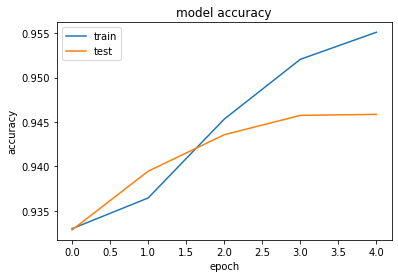

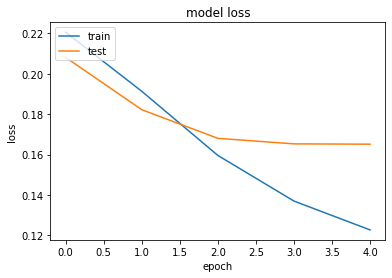

In [24]:
#plotting the loss and accuracy values for training and test sets 
#to see if our model is overfitting.

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [25]:
import pickle
with open('Lstm_model7000.pickle', 'wb') as f:
    pickle.dump(model,f)

In [26]:
pred = model.predict(X_test)
pred

array([[1.5847225e-02, 9.0561353e-02, 5.8422931e-02, ..., 9.8833919e-02,
        7.6144598e-02, 1.9829215e-02],
       [1.5616393e-02, 6.5569505e-02, 5.4582421e-02, ..., 4.7802083e-02,
        1.6260238e-02, 2.8635332e-02],
       [1.2796028e-02, 1.2050631e-01, 1.2444876e-01, ..., 6.3446328e-02,
        9.0980835e-02, 2.7666243e-02],
       ...,
       [1.5230108e-02, 1.6226837e-01, 4.5833066e-03, ..., 5.4397963e-02,
        3.6491472e-02, 1.1333687e-03],
       [9.0855630e-03, 5.6228682e-02, 4.6194512e-03, ..., 1.2637849e-02,
        3.1572092e-02, 4.5058411e-04],
       [1.0476443e-02, 5.8221257e-01, 8.2512510e-05, ..., 3.4290282e-03,
        3.2381405e-04, 4.2082462e-05]], dtype=float32)

In [53]:
labels = ['(unknown)',
 'arts & entertainment',
 'autos & vehicles',
 'beauty & fitness',
 'books & literature',
 'business & industrial',
 'computers & electronics',
 'finance',
 'food & drink',
 'games',
 'health',
 'hobbies & leisure',
 'home & garden',
 'internet & telecom',
 'jobs & education',
 'law & government',
 'news',
 'people & society',
 'pets & animals',
 'real estate',
 'reference',
 'science',
 'shopping',
 'sports',
 'travel']

In [67]:
print(labels[np.argmax(pred[65])-1])

business & industrial


In [68]:
threshold = 0.15
predictions = pred.copy()
predictions[pred>=threshold]=1
predictions[pred<threshold]=0
predictions

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
y_test

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.31618887015177066

In [38]:
#evaluating the model
score = model.evaluate(X_test, predictions, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

3558/3558 [==============================] - 11s 3ms/step
Test Score: 0.047290842021077854
Test Accuracy: 0.9816076606763354


In [70]:
#roc curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred)

0.7887715573071229

In [71]:
 #01 loss
Loss = np.any(y_test != predictions, axis=1).mean()
Loss

0.6838111298482293

In [72]:
#Exact Match Ratio
MR = np.all(predictions == y_test, axis=1).mean()
MR

0.31618887015177066

In [73]:
 def Accuracy(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[0]):
        temp += sum(np.logical_and(y_true[i], y_pred[i])) / sum(np.logical_or(y_true[i], y_pred[i]))
    return temp / y_true.shape[0]
    
    
Accuracy(y_test, predictions)

0.4877599775154566

In [75]:
#predicting with f1_score
from sklearn.metrics import f1_score,precision_score,recall_score
precision = precision_score(y_test, predictions, average='micro')
recall = recall_score(y_test, predictions, average='micro')
f1 = f1_score(y_test, predictions, average='micro')

print("Micro-average quality numbers")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

Micro-average quality numbers
Precision: 0.5993, Recall: 0.5077, F1-measure: 0.5497


In [76]:
for i in range(1,2586):
    print(vectorizer.inverse_transform(predictions[i]))

[array(['computers & electronics'], dtype='<U23')]
[array([], dtype='<U23')]
[array(['games'], dtype='<U23')]
[array(['arts & entertainment', 'games'], dtype='<U23')]
[array(['games', 'sports'], dtype='<U23')]
[array(['arts & entertainment'], dtype='<U23')]
[array(['autos & vehicles'], dtype='<U23')]
[array(['arts & entertainment'], dtype='<U23')]
[array(['sports'], dtype='<U23')]
[array(['science'], dtype='<U23')]
[array(['beauty & fitness', 'science'], dtype='<U23')]
[array(['arts & entertainment'], dtype='<U23')]
[array(['business & industrial'], dtype='<U23')]
[array(['games'], dtype='<U23')]
[array(['business & industrial'], dtype='<U23')]
[array(['beauty & fitness', 'food & drink', 'science'], dtype='<U23')]
[array(['games'], dtype='<U23')]
[array(['sports'], dtype='<U23')]
[array(['autos & vehicles', 'sports'], dtype='<U23')]
[array(['arts & entertainment', 'games'], dtype='<U23')]
[array(['arts & entertainment'], dtype='<U23')]
[array(['beauty & fitness'], dtype='<U23')]
[array

[array(['arts & entertainment'], dtype='<U23')]
[array(['business & industrial'], dtype='<U23')]
[array([], dtype='<U23')]
[array(['arts & entertainment'], dtype='<U23')]
[array([], dtype='<U23')]
[array(['business & industrial'], dtype='<U23')]
[array(['arts & entertainment'], dtype='<U23')]
[array(['computers & electronics', 'internet & telecom'], dtype='<U23')]
[array(['science'], dtype='<U23')]
[array(['computers & electronics', 'internet & telecom'], dtype='<U23')]
[array([], dtype='<U23')]
[array(['arts & entertainment', 'food & drink'], dtype='<U23')]
[array(['games', 'sports'], dtype='<U23')]
[array(['arts & entertainment'], dtype='<U23')]
[array(['computers & electronics', 'internet & telecom'], dtype='<U23')]
[array(['arts & entertainment'], dtype='<U23')]
[array(['autos & vehicles', 'sports'], dtype='<U23')]
[array(['autos & vehicles'], dtype='<U23')]
[array(['games', 'sports'], dtype='<U23')]
[array(['autos & vehicles'], dtype='<U23')]
[array(['business & industrial'], dtyp

[array(['arts & entertainment'], dtype='<U23')]
[array([], dtype='<U23')]
[array(['games', 'sports'], dtype='<U23')]
[array(['arts & entertainment', 'games'], dtype='<U23')]
[array([], dtype='<U23')]
[array([], dtype='<U23')]
[array(['arts & entertainment'], dtype='<U23')]
[array(['autos & vehicles', 'sports'], dtype='<U23')]
[array(['food & drink'], dtype='<U23')]
[array(['hobbies & leisure'], dtype='<U23')]
[array(['beauty & fitness', 'science'], dtype='<U23')]
[array(['arts & entertainment'], dtype='<U23')]
[array(['games'], dtype='<U23')]
[array(['games'], dtype='<U23')]
[array(['computers & electronics', 'internet & telecom'], dtype='<U23')]
[array(['arts & entertainment', 'games'], dtype='<U23')]
[array(['beauty & fitness', 'science'], dtype='<U23')]
[array(['arts & entertainment'], dtype='<U23')]
[array(['science'], dtype='<U23')]
[array(['autos & vehicles', 'business & industrial'], dtype='<U23')]
[array(['autos & vehicles', 'business & industrial'], dtype='<U23')]
[array(['gam